# Question 1:
Learn and understand Zipf’s Law.
	Pick any file (or files) in NLTK package.
	Prove if Zipf’s Law works in Natural Language or not.
	REQUIREMNTS: (Must Do)
Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
Create at least one function and one lambda function.
Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK.
Open your CSV file, generate a log-log figure according to the data you saved.
Write a conclusion at the end of your code base on your figure.
(Optional) Use ‘matplotlib’ to generate a log-log figure in your code.


In [56]:
#Importing nltk
import nltk 
from nltk.corpus import gutenberg


In [57]:
#Importing all the necessary files
import matplotlib.pyplot as plt
import glob, csv, re


In [58]:
#Printing all the files present in Gutenberg package
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [59]:
#Opening one file using glob and then reading data from it
for file in glob.glob('C:/Users/rohini/Downloads/chesterton-brown.txt'):
    with open(file, 'r',encoding="utf-8", errors='ignore') as file:
        data=file.read()


In [60]:
#Using regular expression to get words and then printing the count of words
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',data )
print(len(words))

56129


In [61]:
#Printing the words and their frequency: 
words_dictionary=dict()
for word in words:
    if word not in words_dictionary:
        words_dictionary[word]=1
    else:
        words_dictionary[word] += 1
sorted_words = sorted(words_dictionary.items(), key = lambda x : x[1] ,reverse = True)


In [62]:
#Writing a function to calculate frequency and rank of words
def find_frequency_and_rank():
    with open(('chesterton-brown.csv'), 'w', newline="") as csvfile:
        csv_output = csv.writer(csvfile)
        csv_output.writerow(['Word', 'Freq', 'Rank'])
        rank = 1
        for word in sorted_words:
            csv_output.writerow([word[0], word[1], rank])
            rank +=1
            csvfile.close

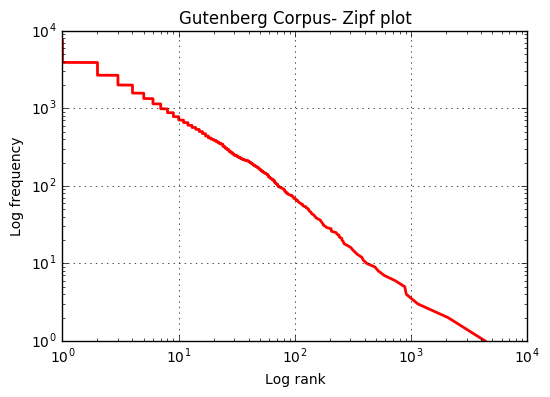

In [63]:
#Calling the function  to calculate the frequency and rank of words
find_frequency_and_rank()

csvfile = open('chesterton-brown.csv', 'r')
word=[]
frequency=[]
rank=[]
csv_f=csv.reader(csvfile)
for row in csv_f:
    word.append(row[0])
    frequency.append(row[1])
    rank.append(row[2])
rank.pop(0)
frequency.pop(0)
plt.loglog(frequency,rank,color='r',linewidth=2)
plt.grid(True)
plt.title("Gutenberg Corpus- Zipf plot")
plt.xlabel("Log rank")
plt.ylabel("Log frequency")
plt.show()